# Financial Python Programming

## This is referred from sentdex youtube tutorial 


In [8]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/2BrpKpWwT2A?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>




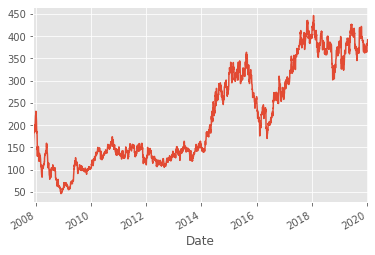

In [2]:
import  datetime as dt
import  matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()

# Pulling 2000-2019 data of NSE tata chemical from yahoo
df = web.DataReader('ADANIPORTS.NS', 'yahoo', start, end)
# print(df.head())
# print(df.tail())

df.to_csv('adaniports.csv')

#df = pd.read_csv('nsetatachem.csv', parse_dates= True, index_col=0)
# print(df.head())
# print(df[['Open', 'High']].head())

df['Adj Close'].plot()
plt.show()


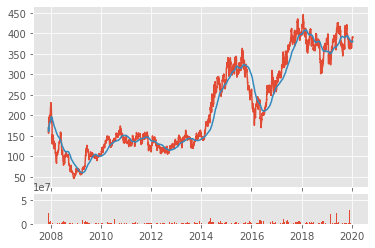

In [4]:
## Moving average tutorial

import  datetime as dt
import  matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()

df = pd.read_csv('adaniports.csv', parse_dates= True, index_col=0)

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True)
# print(df.tail())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()



       Date       open       high        low      close
0  730122.0  27.965670  27.965670  25.388708  26.083370
1  730132.0  25.478338  27.338228  24.895716  27.338228
2  730142.0  27.136559  27.136559  24.895716  24.895716
3  730152.0  25.971327  25.971327  23.618441  23.618441
4  730162.0  22.991005  23.125456  22.363573  22.363573


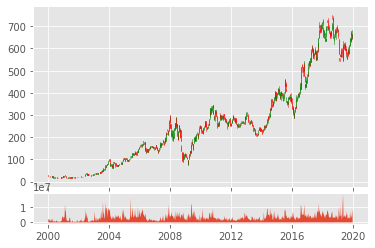

In [19]:
import  datetime as dt
import  matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()

df = pd.read_csv('adaniports.csv', parse_dates= True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

# reset index to value
df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

print(df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()

In [35]:
# Get Nifty 50 ticker and save in file

# used for scraping from web example wikipedia
import bs4 as bs

#used for serialization
import pickle

#used for http request
import requests

def save_nifty50_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id' : 'constituents'})
    print(table)
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        tickers.append(ticker)
        
    with open("nifty50tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    print(tickers)       
    return  tickers

save_nifty50_tickers()
        
    
        


<table class="wikitable sortable" id="constituents" style="font-size:85%">
<tbody><tr>
<th>Company Name</th>
<th>Symbol</th>
<th>Sector
</th></tr>
<tr>
<td>Adani Ports
</td>
<td>ADANIPORTS.NS
</td>
<td>Infrastructure
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Asian_Paints_Ltd" title="Asian Paints Ltd">Asian Paints Ltd</a></td>
<td>ASIANPAINT.NS</td>
<td>Consumer Goods
</td></tr>
<tr>
<td><a href="/wiki/Axis_Bank" title="Axis Bank">Axis Bank</a></td>
<td>AXISBANK.NS</td>
<td>Banking
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Auto" title="Bajaj Auto">Bajaj Auto</a></td>
<td>BAJAJ-AUTO.NS</td>
<td>Automobile
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finance" title="Bajaj Finance">Bajaj Finance</a></td>
<td>BAJFINANCE.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finserv" title="Bajaj Finserv">Bajaj Finserv</a></td>
<td>BAJAJFINSV.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bharti_Airtel" title="Bharti Airtel">Bharti Airtel</a></td>


['ADANIPORTS.NS\n',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BPCL.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'BRITANNIA.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
# used for scraping from web example wikipedia
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
#used for serialization
import pickle

#used for http request
import requests



def save_nifty50_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id' : 'constituents'})
    print(table)
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        tickers.append(ticker)
        
    with open("nifty50tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    print(tickers)       
    return  tickers

# save_nifty50_tickers()



def get_dat_from_yahoo(reload_nifty50=False):
    if reload_nifty50:
        tickers = save_nifty50_tickers()
    else:
        with open("nifty50tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
          
    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker.strip(), 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

get_dat_from_yahoo(True)


<table class="wikitable sortable" id="constituents" style="font-size:85%">
<tbody><tr>
<th>Company Name</th>
<th>Symbol</th>
<th>Sector
</th></tr>
<tr>
<td>Adani Ports
</td>
<td>ADANIPORTS.NS
</td>
<td>Infrastructure
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Asian_Paints_Ltd" title="Asian Paints Ltd">Asian Paints Ltd</a></td>
<td>ASIANPAINT.NS</td>
<td>Consumer Goods
</td></tr>
<tr>
<td><a href="/wiki/Axis_Bank" title="Axis Bank">Axis Bank</a></td>
<td>AXISBANK.NS</td>
<td>Banking
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Auto" title="Bajaj Auto">Bajaj Auto</a></td>
<td>BAJAJ-AUTO.NS</td>
<td>Automobile
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finance" title="Bajaj Finance">Bajaj Finance</a></td>
<td>BAJFINANCE.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finserv" title="Bajaj Finserv">Bajaj Finserv</a></td>
<td>BAJAJFINSV.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bharti_Airtel" title="Bharti Airtel">Bharti Airtel</a></td>


In [6]:
# Merge Adj close data in one csv for processing
def compile_data():
    with open("nifty50tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 == 0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('nifty50_joined_closes.csv')
            
compile_data()            
        
        


0
10
20
30
40
            ADANIPORTS.NS\n  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
Date                                                                     
2000-01-03              NaN            NaN     0.976623            NaN   
2000-01-04              NaN            NaN     1.014331            NaN   
2000-01-05              NaN            NaN     0.987936            NaN   
2000-01-06              NaN            NaN     0.963426            NaN   
2000-01-07              NaN            NaN     0.916292            NaN   

            BAJFINANCE.NS  BAJAJFINSV.NS  BHARTIARTL.NS  INFRATEL.NS  \
Date                                                                   
2000-01-03            NaN            NaN            NaN          NaN   
2000-01-04            NaN            NaN            NaN          NaN   
2000-01-05            NaN            NaN            NaN          NaN   
2000-01-06            NaN            NaN            NaN          NaN   
2000-01-07            NaN          

                 ADANIPORTS.NS\n  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
ADANIPORTS.NS\n         1.000000       0.919444     0.938103       0.609047   
ASIANPAINT.NS           0.919444       1.000000     0.969257       0.777606   
AXISBANK.NS             0.938103       0.969257     1.000000       0.498506   
BAJAJ-AUTO.NS           0.609047       0.777606     0.498506       1.000000   
BAJFINANCE.NS           0.817622       0.898879     0.832148       0.738904   

                 BAJFINANCE.NS  BAJAJFINSV.NS  BHARTIARTL.NS  INFRATEL.NS  \
ADANIPORTS.NS\n       0.817622       0.862143       0.500377     0.671235   
ASIANPAINT.NS         0.898879       0.929040       0.525190     0.502716   
AXISBANK.NS           0.832148       0.867461       0.609151     0.638543   
BAJAJ-AUTO.NS         0.738904       0.801767       0.479381    -0.320164   
BAJFINANCE.NS         1.000000       0.988857       0.390202     0.272934   

                  BPCL.NS  CIPLA.NS  ...  TATAMOTORS.NS  TATAS

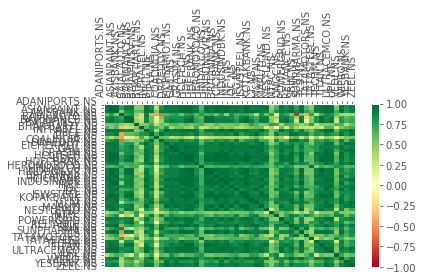

In [7]:
# Company correlation in nifty50
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
#used for serialization
import pickle

#used for http request
import requests

import  matplotlib.pyplot as plt
from matplotlib import style

import numpy as np

style.use('ggplot')

def visualize_data():
    df = pd.read_csv('nifty50_joined_closes.csv')
##    df['VEDL.NS'].plot()
##    plt.show()
    df_corr = df.corr()
    df_corr.to_csv('niftyheatmap.csv')
    
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

visualize_data()

In [24]:
# Preprocessing data for machine learning
from collections import Counter
import numpy as np
import pandas as pd
import pickle
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def process_data_for_labels(ticker):
    ticker = ticker.strip()
    hm_days = 7
    df = pd.read_csv('nifty50_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker])/df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers, df

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > 0.025:
            return 1
        if col < -0.025:
            return -1
    return 0    

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)],
                                              ))
    
    vals= df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df
    

def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
    
    #clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

do_ml('HCLTECH.NS')

Data spread: Counter({'1': 2046, '-1': 1566, '0': 1358})


/home/darshit/repo/sentdex tuts/python-finance/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.5020177562550444
Predicted spread: Counter({1: 934, -1: 165, 0: 140})


0.5020177562550444